In [86]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import math

In [51]:
dataset = pd.read_csv(r'E:\Data_warehouse\time_series_data\airline-passengers.txt', usecols=[1])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 1.2 KB


In [52]:
dataset.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


In [53]:
dataset.columns, dataset.index

(Index(['Passengers'], dtype='object'), RangeIndex(start=0, stop=144, step=1))

<AxesSubplot:>

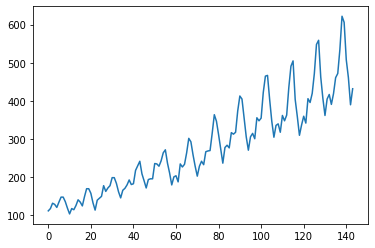

In [54]:
dataset['Passengers'].plot()

In [ ]:
# https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/
# We want to phrase the time series prediction problem as a regression.
# That is, given the number of passengers this month, what is the number of passengers next month. 
# We can write a simple function to convert our single column of data into a two-column dataset. The 
# first column containing this month's (t) passenger count and the second column containing next month's (t+1) 
# passenger count, to be predicted 

In [55]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [56]:
dataset['Passengers'] = dataset['Passengers'].astype('float32')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  144 non-null    float32
dtypes: float32(1)
memory usage: 704.0 bytes


In [57]:
dataset.head()

,Passengers
0,112.0
1,118.0
2,132.0
3,129.0
4,121.0


In [58]:
# split into train and test sets
train_size = int(dataset.shape[0]*0.67)
train = dataset.iloc[:train_size]
train

,Passengers
0,112.0
1,118.0
2,132.0
3,129.0
4,121.0
...,...
91,405.0
92,355.0
93,306.0
94,271.0


In [59]:
test = dataset.iloc[train_size:]
test

,Passengers
96,315.0
97,301.0
98,356.0
99,348.0
100,355.0
101,422.0
102,465.0
103,467.0
104,404.0
105,347.0


In [75]:
# This default will create a dataset where X is the number of passengers at a given time(t) and Y is
# the number of passengers at the xnext time (t+1)
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset.iloc[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset.iloc[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [77]:
look_back = 1
train_X, train_Y = create_dataset(train, look_back)
test_X, test_Y = create_dataset(test, look_back)

In [82]:
train_X.shape, train_Y.shape, test_X.shape, test_Y.shape

((94, 1), (94,), (46, 1), (46,))

In [84]:
# we use a simple network with 1 input, 1 hidden layer with 8 neurons and an output layer. The model is fit using mean squared error, which if
# we take the square root gives us an error score in the units of the dataset. 
# create and fit Multilayer Perceptron model 
model = Sequential()
model.add(Dense(8, input_shape=(look_back,), activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 16        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [94]:
history = model.fit(train_X, train_Y, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
47/47 - 0s - loss: 536.4568 - 34ms/epoch - 721us/step
Epoch 2/200
47/47 - 0s - loss: 537.3759 - 29ms/epoch - 615us/step
Epoch 3/200
47/47 - 0s - loss: 545.5405 - 29ms/epoch - 615us/step
Epoch 4/200
47/47 - 0s - loss: 554.9463 - 29ms/epoch - 615us/step
Epoch 5/200
47/47 - 0s - loss: 548.2598 - 28ms/epoch - 600us/step
Epoch 6/200
47/47 - 0s - loss: 537.4208 - 27ms/epoch - 572us/step
Epoch 7/200
47/47 - 0s - loss: 538.4324 - 27ms/epoch - 569us/step
Epoch 8/200
47/47 - 0s - loss: 545.2058 - 28ms/epoch - 588us/step
Epoch 9/200
47/47 - 0s - loss: 541.8884 - 27ms/epoch - 573us/step
Epoch 10/200
47/47 - 0s - loss: 542.4471 - 27ms/epoch - 573us/step
Epoch 11/200
47/47 - 0s - loss: 536.5015 - 28ms/epoch - 596us/step
Epoch 12/200
47/47 - 0s - loss: 540.3624 - 27ms/epoch - 578us/step
Epoch 13/200
47/47 - 0s - loss: 562.1847 - 28ms/epoch - 594us/step
Epoch 14/200
47/47 - 0s - loss: 541.0905 - 27ms/epoch - 573us/step
Epoch 15/200
47/47 - 0s - loss: 540.1537 - 27ms/epoch - 572us/step
Epoc

In [88]:
trainScore = model.evaluate(train_X, train_Y, verbose=0)
print('Train Score : %0.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(test_X, test_Y, verbose=0)
print('Test Score : %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score : 532.96 MSE (23.09 RMSE)
Test Score : 2359.85 MSE (48.58 RMSE)


In [96]:
# 모델 시각화 : https://keras.io/ko/visualization/#_1
from keras.utils import plot_model
plot_model(model, to_file='model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


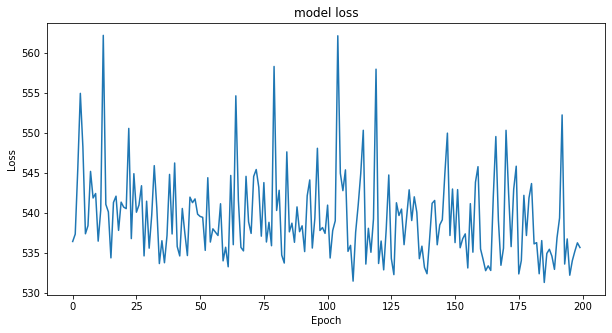

In [105]:
# 학습 정확성 값과 검증 정확성 값을 플롯팅 합니다. 
%matplotlib inline
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [108]:
# generate predictions for training 
trainPredict = model.predict(train_X)
testPredict = model.predict(test_X) 

2/2 [==============================] - 0s 2ms/step


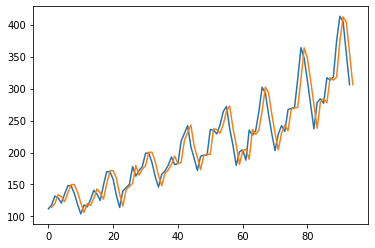

In [118]:
plt.plot(train_X)

# shift train predictions for plotting 
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan 
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

plt.plot(trainPredictPlot)

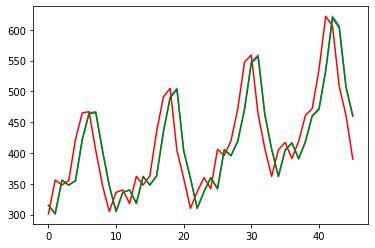

In [124]:
plt.plot(test_X, color='steelblue')
plt.plot(test_Y, color='red')
plt.plot(testPredict, color='green')

In [ ]:
# the ruslts may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. 
# Consider running the example a few times and compare the average outcome 